# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Load Data

In [3]:
df=pd.read_csv("Datasets/car data.csv")

# Step 2: EDA

In [53]:
#showing the data
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.4,5.6,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.8,9.5,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.2,9.8,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.9,4.2,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.6,6.9,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.2,9.8,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.8,8.1,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.5,8.6,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.8,8.9,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.5,8.9,42367,Diesel,Dealer,Manual,0


In [60]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [61]:
#statistical measures of the data
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.0,301.0,301.0,301.0,301.0
mean,2013.6,4.7,7.6,36947.2,0.0
std,2.9,5.1,8.6,38886.9,0.2
min,2003.0,0.1,0.3,500.0,0.0
25%,2012.0,0.9,1.2,15000.0,0.0
50%,2014.0,3.6,6.4,32000.0,0.0
75%,2016.0,6.0,9.9,48767.0,0.0
max,2018.0,35.0,92.6,500000.0,3.0


In [63]:
#number of duplicate values
df.duplicated().sum()

2

In [118]:
#unique values of some of the data
print(df["Year"].unique())
print(df["Transmission"].unique())
print(df["Fuel_Type"].unique())
print(df["Owner"].unique())

[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']
[0 1 3]


In [88]:
#finding null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [90]:
#data types of the data
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

<Axes: >

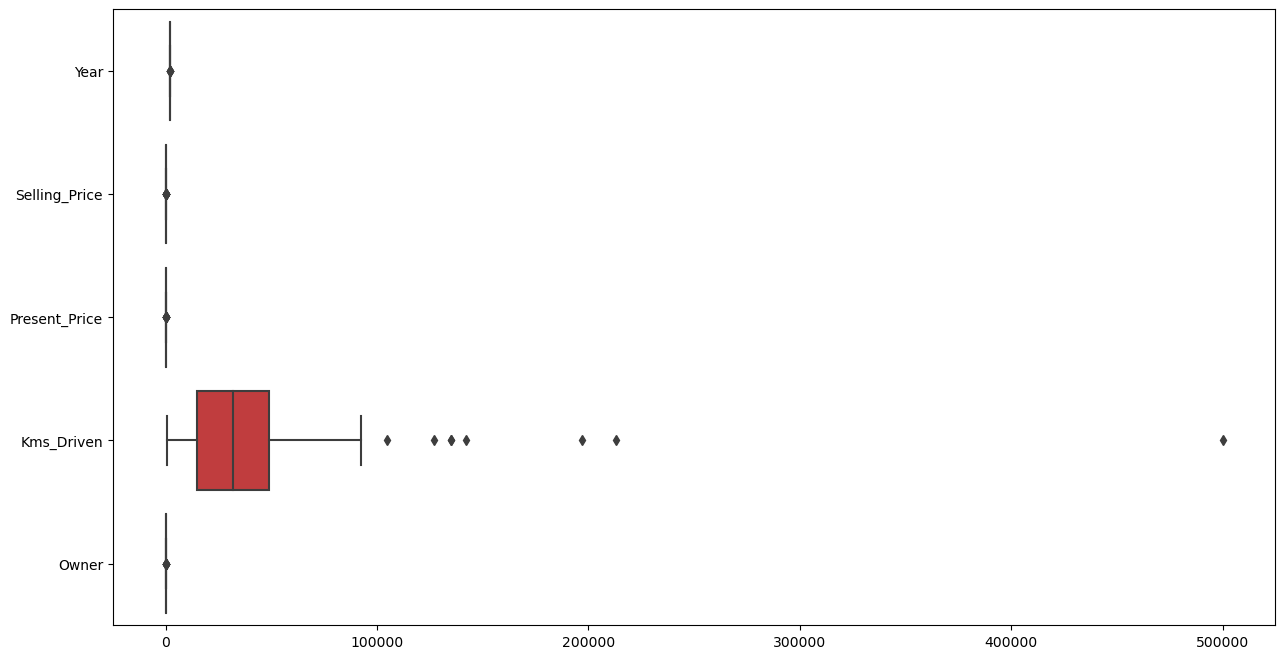

In [119]:
#box plots of the data to check outliers
plt.figure(figsize=(15,8))
sns.boxplot(df,orient="h")

<Axes: >

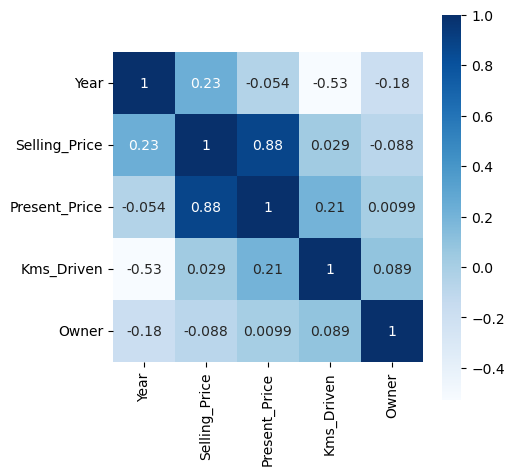

In [117]:
#heatmap for correlation
numerical_features=["Year","Selling_Price","Present_Price","Kms_Driven","Owner"]
plt.figure(figsize=(5,5))
sns.heatmap(df[numerical_features].corr(),cbar=True,annot=True,square=True,cmap="Blues")

# Step 3: Data Preprocessing

In [5]:
#set the display precision for floating-point numbers
pd.set_option('display.float_format', '{:.1f}'.format)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.4,5.6,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.8,9.5,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.2,9.8,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.9,4.2,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.6,6.9,42450,Diesel,Dealer,Manual,0


In [114]:
#removing duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<Axes: >

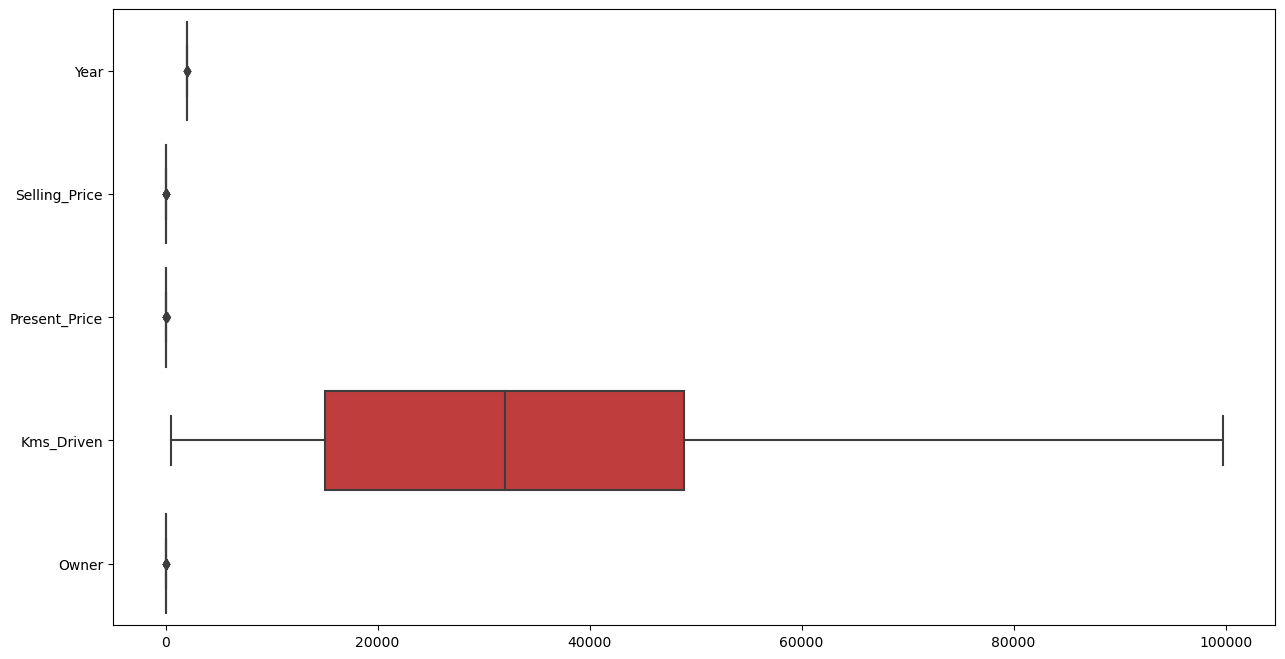

In [122]:
#handling the outliers using IQR method
def detect_limits(data,feature):
    Q1=data[feature].quantile(0.25)
    Q3=data[feature].quantile(0.75)
    IQR=Q3-Q1
    
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    
    return lower_limit,upper_limit

lower_limit ,upper_limit=detect_limits(df,"Kms_Driven")

df["Kms_Driven"]=np.where(df["Kms_Driven"]>upper_limit,upper_limit,
                         np.where(df["Kms_Driven"]<lower_limit,lower_limit,df["Kms_Driven"]))

plt.figure(figsize=(15,8))
sns.boxplot(df,orient="h")

In [123]:
#encode categorical features
categorical_features=["Car_Name","Fuel_Type","Seller_Type","Transmission"]
label_encoder=LabelEncoder()
df[categorical_features]=df[categorical_features].apply(lambda feature: label_encoder.fit_transform(feature))
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.4,5.6,27000.0,2,0,1,0
1,93,2013,4.8,9.5,43000.0,1,0,1,0
2,68,2017,7.2,9.8,6900.0,2,0,1,0
3,96,2011,2.9,4.2,5200.0,2,0,1,0
4,92,2014,4.6,6.9,42450.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.5,11.6,33988.0,1,0,1,0
297,66,2015,4.0,5.9,60000.0,2,0,1,0
298,69,2009,3.4,11.0,87934.0,2,0,1,0
299,69,2017,11.5,12.5,9000.0,1,0,1,0


In [132]:
#scaling numerical features
numerical_features=["Year","Selling_Price","Present_Price","Kms_Driven","Owner"]
scaler=StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,0.1,-0.2,-0.2,-0.3,2,0,1,-0.2
1,93,-0.2,0.0,0.2,0.4,1,0,1,-0.2
2,68,1.2,0.5,0.3,-1.2,2,0,1,-0.2
3,96,-0.9,-0.3,-0.4,-1.2,2,0,1,-0.2
4,92,0.1,0.0,-0.1,0.3,1,0,1,-0.2
...,...,...,...,...,...,...,...,...,...
296,69,0.8,1.0,0.5,-0.0,1,0,1,-0.2
297,66,0.5,-0.1,-0.2,1.1,2,0,1,-0.2
298,69,-1.6,-0.2,0.4,2.3,2,0,1,-0.2
299,69,1.2,1.4,0.6,-1.1,1,0,1,-0.2


# Step 4: Split Dataset Into Training And Test Set

In [168]:
x=df.drop(["Car_Name","Seller_Type"],axis=1).values
y=df["Selling_Price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=3)

# Step 5: Modelling

In [169]:
liner = LinearRegression()
liner.fit(x_train, y_train)
y_pred = liner.predict(x_test)
Liner_r2_score = r2_score(y_test,y_pred)*100

In [170]:
print("Linear Regression Accuracy: %.2f" % Liner_r2_score ,"%")

Linear Regression Accuracy: 100.00 %
